# Task: Market price predicion:

# Objective:
The primary objective of this project is to develop a robust time series machine learning model capable of
accurately forecasting market trends based on historical data. By leveraging advanced algorithms, we aim
to predict the quantity and prices of commodities for future months, empowering stakeholders to make
proactive decisions regarding production, procurement, pricing strategies, and resource allocation.

# Data Description:
The dataset comprises the following columns:
1. market: The market or commodity under consideration.
2. month: The month for which the data is recorded.
3. year: The year corresponding to the recorded data.
4. quantity: The quantity of the commodity traded or available.
5. priceMin: The minimum price of the commodity during the month.
6. priceMax: The maximum price of the commodity during the month.
7. priceMod: The mode or most frequently occurring price of the commodity during the month.
8. state: The state or region where the market is located.
9. city: The city where the market is situated.
10. date: The specific date of the recorded data.


# 1. Data Preprocessing

Load libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

c:\Users\Shaheen\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv("MarketPricePrediction.csv")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


## 1.1 Statistical summary

In [5]:
df.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [6]:
# handling missing values
df.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

## 1.2 convert date column into datetime

In [7]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format='%B-%Y')

In [8]:
# Sort by date
df = df.sort_values('date')

## 1.3 encoding categorical variable:

In [9]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
# df_encoded = pd.get_dummies(df, columns=['market', 'month', 'year', 'state', 'city'])
# Encode categorical variables
label_encoders = {}
for column in ['market', 'state', 'city']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

**Exploratory Data Analysis (EDA)**

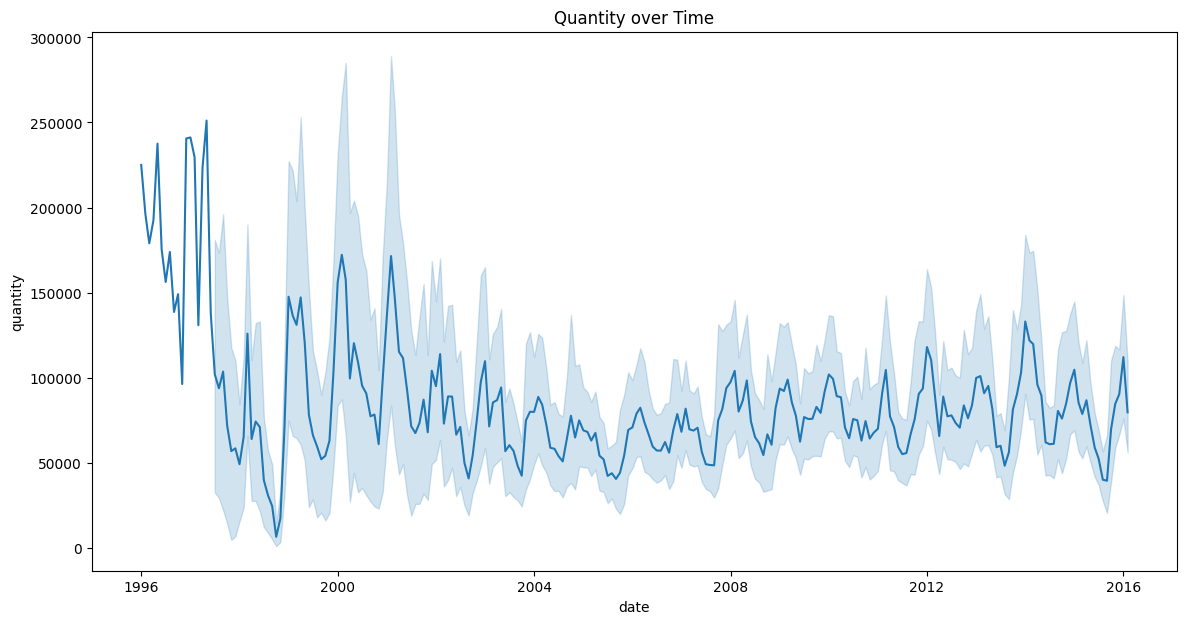

In [10]:
# Plotting time series for quantity
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='quantity')
plt.title('Quantity over Time')
plt.show()

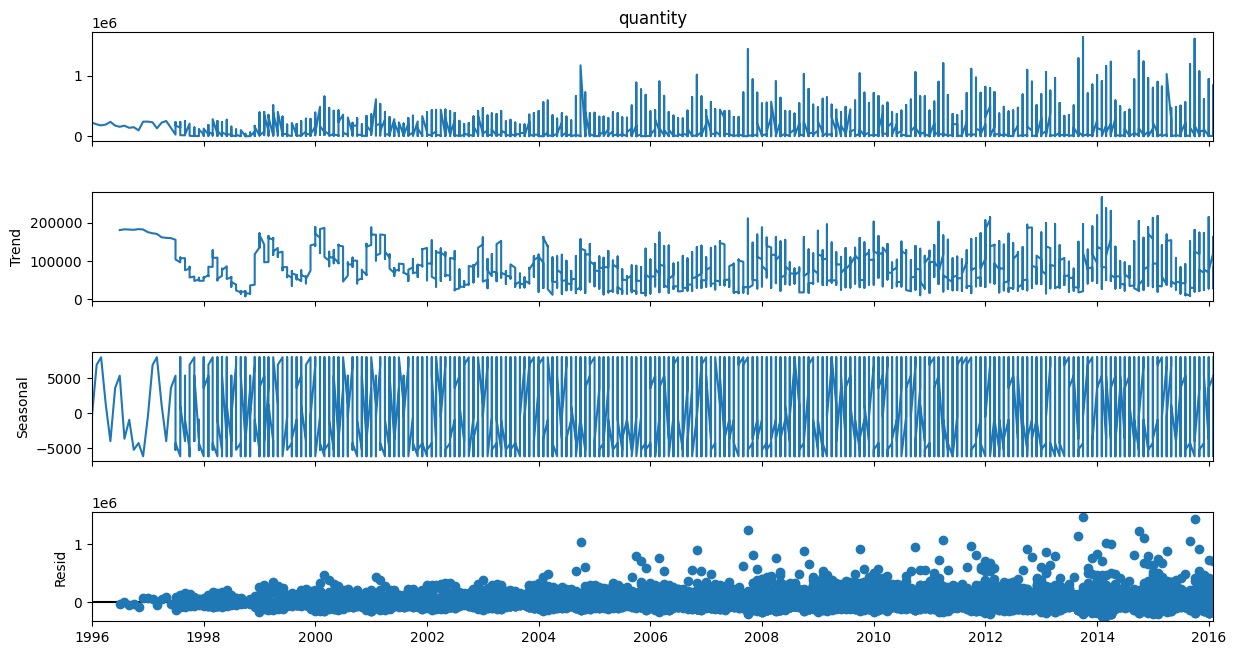

In [11]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df.set_index('date')['quantity'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

**Step 3: Feature Engineering**

In [12]:
# Create lagged features
df['quantity_lag1'] = df['quantity'].shift(1)
df['quantity_lag2'] = df['quantity'].shift(2)

# Create rolling statistics
df['quantity_roll_mean'] = df['quantity'].rolling(window=3).mean()
df['quantity_roll_std'] = df['quantity'].rolling(window=3).std()

# Drop rows with NaN values created by lagging
df.dropna(inplace=True)

print(df.head())


      market  month  year  quantity  priceMin  priceMax  priceMod  state  \
5441      68  March  1996    178992       155       274       243     14   
5461      68  April  1996    192592       136       279       254     14   
5481      68    May  1996    237574       154       312       269     14   
5501      68   June  1996    175308       229       413       367     14   
5521      68   July  1996    156282       229       406       368     14   

      city       date  quantity_lag1  quantity_lag2  quantity_roll_mean  \
5441    65 1996-03-01       196164.0       225063.0       200073.000000   
5461    65 1996-04-01       178992.0       196164.0       189249.333333   
5481    65 1996-05-01       192592.0       178992.0       203052.666667   
5501    65 1996-06-01       237574.0       192592.0       201824.666667   
5521    65 1996-07-01       175308.0       237574.0       189721.333333   

      quantity_roll_std  
5441       23282.922304  
5461        9060.875307  
5481       306

**Step 4: Model Selection and Training**


*   Evaluate various time series forecasting models such as SARIMA.



In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model
model = SARIMAX(df['quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast
forecast = model_fit.forecast(steps=12)
print(forecast)


c:\Users\Shaheen\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shaheen\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


10225    92352.223933
10226    92128.998430
10227    90918.918784
10228    93129.168277
10229    88326.426532
10230    83823.896632
10231    84314.054421
10232    87868.462811
10233    82162.580565
10234    86389.877548
10235    91972.528219
10236    86976.044384
Name: predicted_mean, dtype: float64


c:\Users\Shaheen\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Shaheen\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


**Step 5: Model Evaluation**

*   Assess the model's performance using appropriate metrics such as MAE, MSE, and RMSE.



In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assume `y_true` are the actual values and `y_pred` are the predicted values
y_true = df['quantity'][-12:]  # Replace with your actual test set
y_pred = forecast

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')


MAE: 61164.94353983933, MSE: 6158665522.028487, RMSE: 78477.16560903871


**Step 6: Fine-tuning and Validation**

*   Fine-tune model parameters, validate its performance on unseen data, and iterate if necessary.



In [15]:
# Example of parameter tuning for SARIMA using grid search (simplified)
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

best_aic = float('inf')
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(df['quantity'], order=param, seasonal_order=param_seasonal)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)
        except:
            continue

print(f'Best SARIMA parameters: {best_params} with AIC: {best_aic}')


c:\Users\Shaheen\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shaheen\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shaheen\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shaheen\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shaheen\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An u

Best SARIMA parameters: ((0, 0, 0), (0, 1, 1, 12)) with AIC: 268890.9500425615


In [16]:
import joblib

# Save the trained model
model_fit.save('sarima_model.pkl')
